# パーセプトロン
## パーセプトロンの概要
人工知能の分野においてニューロンの神経ネットワークを模倣した計算モデルをニューラルネットワークと呼ぶ
パーセプトロンは　現在のニューラルネットワークやディープラーニングの基礎となっている理論です

パーセプトロンは　y= {0,1}を識別する2値分類器
たとえば腫瘍の良性を１　悪性１を０とするような問題をとける
![IMG_1050.PNG](attachment:IMG_1050.PNG)

図１は一つのニューロン　黒の実線はニューロンの結合を表している。
ニューラルネットワークは複数のにゅーろんどうしのけつごうで　表現される。
パーセプトロンは二層のニューラルネットワークで構成される

例
腫瘍データの場合　x1に細胞の半径　x2に細胞の面積と威風に特徴量が一つづつ入力される

入力層に入力された入力ｘが中間層で重みwとかけられた総和zが出力層に入力される

![IMG_1051.PNG](attachment:IMG_1051.PNG)

## パーセプトロンの学習
入力に対して適切な出力をするような重みwを適切に求めることが大事

過去の事例から良性または悪性となるような重みを求めることが目的
**学習とは訓練データをうまく分類する重みwをもとめることである**

![IMG_1052.PNG](attachment:IMG_1052.PNG)

In [8]:
## パーセプトロンの実験

### データの準備
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
#特徴量
X = breast_cancer.data
#目的変数
y = breast_cancer.target

## 日本語の特徵量名の用意
columns = ['半径','テクスチャ','周囲の長さ','面積','なめらかさ','コンパクト性','へこみ','へこみの数','対称性','フラクタル次元']

## x,y,columnsを利用してデータフレームを作ってみる
from pandas import DataFrame
df = DataFrame(data=X[:, :10], columns=columns)
df['目的変数'] = y

## 特徴量として面積とへこみのみを利用するのでDataFrameからとりだします
x = df[['面積','へこみ']].values
y = df['目的変数'].values

In [9]:
## 次にロードしたデータを訓練データとテストデータに分割する
### これは学習したモデルの性能評価をするための操作　 7割を訓練に　３割をテスト用のデータに分割する 訓練用に分割したデータを訓練データ　テスト用に分割したデータをテストセットと呼ぶ
### この操作にはscikit-learnのtrain_test_split()関数を使える
from sklearn.model_selection import train_test_split

### 訓練データをX_train, y_train テストデータを　x＿test, y_testという変数に代入する
### random_stateパラメータに分割方法のシードを与え再現性のある分割方法にした
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)

print('すべてのデータ数=',len(y))
print('訓練データ数=',len(y_train))
print('テストデータ数=',len(y_test))

##　ちゃんと30%分割できていることがわかる

すべてのデータ数= 569
訓練データ数= 398
テストデータ数= 171


## データの前処理
一般的に機械学習アルゴリズムに入力する特徴量のスケールをあわせておくのがよい
ここでは標準化と呼ばれる操作をする
標準化はj番目の特徴量の平均をμｊ、標準偏差をσ
$$
    x_j = \frac{x_j - μ_j}{σ_j}
$$
の変換のことで平均が0　標準偏差が１となるように変換される

標準化の前処理は scikit-learnのStandardScalerに実装されているからそれを使うと良い


In [10]:
##標準化の前処理は scikit-learnのStandardScalerに実装されているからそれを使うと良い
from sklearn.preprocessing import StandardScaler

## StandardScalerをimport後標準化に必要な平均と標準偏差を訓練データから求める
## StandardScalerのインスタンスを作成する
sc = StandardScaler()
## 訓練データの平均と標準偏差を計算する
sc.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
## 求めた平均を確認してみます
print(sc.mean_)

[1.41760779e+01 1.91591709e+01 9.22563317e+01 6.59770854e+02
 9.59617839e-02 1.03303191e-01 8.80707764e-02 4.84396935e-02
 1.80308291e-01 6.26639196e-02 4.04788693e-01 1.20362688e+00
 2.87530226e+00 4.05973291e+01 7.05388442e-03 2.53561106e-02
 3.22594570e-02 1.19258693e-02 2.03723342e-02 3.79088518e-03
 1.62873216e+01 2.55055528e+01 1.07363844e+02 8.81848241e+02
 1.31772035e-01 2.49086005e-01 2.68497359e-01 1.13838822e-01
 2.88299749e-01 8.35374121e-02]


In [12]:
## 特徴量米に平均を計算しているため値が２こあります
## このscを利用して訓練データとテストデータを標準化します　transform()メソッドを利用する

## 訓練データの標準化
X_train_std = sc.transform(X_train)

## テストデータの標準化
## テストデータは訓練データの平均と標準偏差を用いて変換する
X_test_std = sc.transform(X_test)

## ここで、テストデータの変換には訓練データの平均と標準偏差が利用されている　同じscインスタンスを利用していることに注意する
## これはテストデータは未知であるという前提のためテストデータに施せるしょｒは既知のデータの情報のみで行われる必要があるから

In [13]:
## 標準化後の訓練データの平均値
train_mean = X_train_std.mean(axis=0)
print(train_mean)

## 標準化後の訓練データの標準偏差
train_std = X_train_std.std(axis=0)
print(train_std )

## 壁んちがほぼ０分散が１になっているのが確認できる

[-1.20869255e-15 -3.93292322e-15 -3.50361839e-15  2.23160407e-16
 -2.97863353e-15  9.79674187e-16  5.20521649e-16  2.25949912e-16
 -1.35005072e-15  3.02103401e-16  5.08247827e-16 -3.65425166e-16
 -1.17996065e-16 -6.12575317e-16 -1.19056077e-15 -2.49270175e-15
 -3.00429698e-16  1.11663889e-15 -3.51756591e-16 -1.23017174e-16
  6.05880505e-16  3.82162197e-16 -1.60396543e-15 -1.79644128e-15
 -2.81461063e-16 -1.61233394e-16 -4.34604893e-16  7.29455580e-16
  1.52753299e-15 -3.03609734e-15]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
## 標準化後のテストデータの平均値
test_mean = X_test_std.mean(axis=0)
print(test_mean)

## 標準化後のテストデータの標準偏差
test_std = X_test_std.std(axis=0)
print(test_std)

## 訓練データほどの制度で平均０　標準偏差が１になってない
## テストデータと訓練データは一般的に異なるからこれが正常

[-0.04597057  0.10315646 -0.03940727 -0.04532172  0.09644359  0.06751963
  0.0311842   0.04235786  0.10583278  0.06145088  0.00439741  0.08484972
 -0.01456632 -0.01773739 -0.01380772  0.02259276 -0.04054311 -0.06933399
  0.07063855  0.00505069 -0.01258607  0.09504674 -0.0103356  -0.00738487
  0.08632782  0.1160991   0.06269844  0.0400205   0.09493967  0.07767338]
[0.98948188 1.06486142 1.00201041 0.9345188  1.06850497 1.10055609
 1.07933796 1.09397721 1.06335606 0.91074849 0.84144475 1.19355726
 0.84740131 0.74573382 0.87650678 0.98492661 1.0151084  0.96512907
 1.0999758  0.99515494 1.02426784 1.06778101 1.05252708 0.99307625
 0.97075273 1.1811251  1.19883296 1.09394138 0.97376989 1.09913189]


In [15]:
#　学習
## パーセプトロンの学習
from sklearn.linear_model import Perceptron

## Perceptionのインスタすを作成する
### max_iterは重みの最大更新回数　random_stateはら数生成シード値を固定するパラメーター　これにより実行のたびに結果が変わってしまうことを防ぐ
ppn = Perceptron(max_iter=1000, random_state=42)

### パーセプトロンを学習する　fit()メソッドを呼ぶだけ これだけで学習がおわる
ppn.fit(X_train_std, y_train)

/Users/marina/.local/share/virtualenvs/python_ML-mAoi_q9c/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=1000, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=42, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
#予測
## 学習したパーセプトロンモデルを利用して未知のデータに対して予測を行ってみる
## predict()メソッドにテスト用のデータをわたす

## テストデータの予測
pred = ppn.predict(X_test_std)
print(pred)

## これは予測している

[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [17]:
## テストデータの正解値
print(y_test)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [18]:
#　評価
## 予測値がどの程度正解しているかみてみる
## 正解率の計算もscikit-learnにおまかせする　accuracy_score()換羽雨を利用して正解率を求めてみる
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9298245614035088

In [39]:
# 決定領域
## パーセプトロンが学習した決定領域を確認してみる
## 決定領域をプロットすることでパーセプトロンが最終的にどうやって学習したのか視覚的にわかるようにする

import numpy
from matplotlib import pyplot
pyplot.rcParams['font.family'] = 'IPAPGothic'
from mlxtend.plotting import plot_decision_regions

## すべてのデータをプロットするとデータが多すぎるので制限する
N = 100

## 訓練データとテストデータからN個ずつのサンプルを先頭からとってくる
sampled_X = numpy.vstack((X_train_std[:N], X_test_std[:N]))
sampled_Y = numpy.hstack((y_train[:N],y_test[:N]))
print(sampled_X )
print('/////////')
print(sampled_Y )

[[-0.12348985 -0.29680142 -0.17050713 ... -0.84082156 -0.8563616
  -0.76574773]
 [-0.22826757 -0.65795149 -0.25377521 ... -0.37706655 -1.3415819
  -0.41480748]
 [ 0.14553402 -1.23056444  0.24583328 ... -0.04762652 -0.08997059
   0.4882635 ]
 ...
 [-0.10366704  1.0907752  -0.02870406 ...  1.37075229  2.48876645
   1.43248709]
 [-0.85693388 -1.44440331 -0.88158357 ... -0.92122249 -0.03855652
  -0.9040662 ]
 [ 0.87614621  1.48756509  0.83035872 ...  0.94132047 -0.61535813
  -0.23419329]]
/////////
[1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0
 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 1
 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0]


ValueError: Filler values must be provided when X has more than 2 training features.

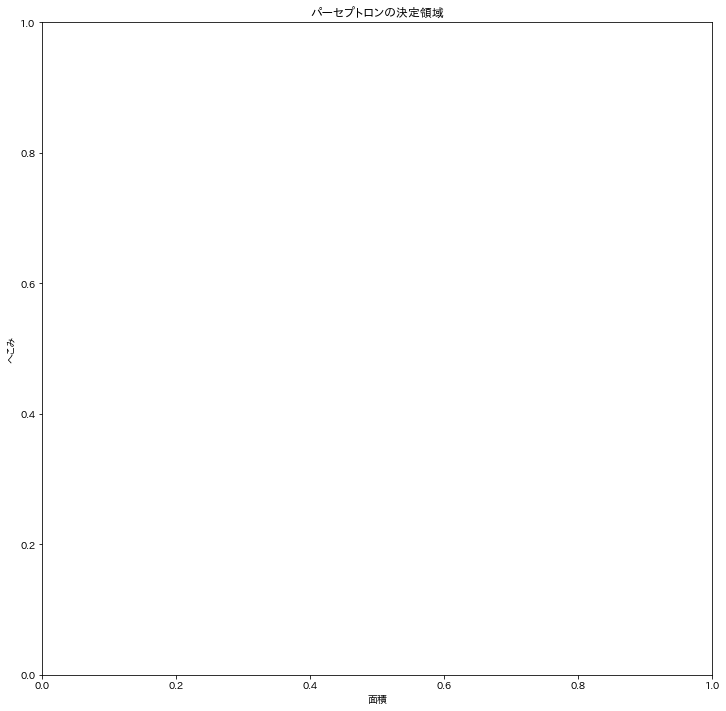

In [40]:
## 上記コードでプロットするためのデータを用意　plot_decision_regions()関数にこれらのデータをいれる
pyplot.figure(figsize=(12,12))
pyplot.xlabel("面積")
pyplot.ylabel("へこみ")
pyplot.title("パーセプトロンの決定領域")

## 決定領域のプロット
plot_decision_regions(sampled_X, sampled_Y, clf=ppn, legend =2, X_highlight=X_test_std[:N])